In [1]:
import os
import numpy as np
import pandas as pd
#import ipaddress
import matplotlib.pyplot as plt
import random as rand

pd.options.mode.chained_assignment = None

geolite_folder = r'/home/jacco/Desktop/500m'  # folder with geolite dataset, also used to store intermediate files
trace_folder = r'/media/jacco/9C33-6BBD/traces_output' #r'/home/jacco/Desktop/res' # folder with caida traces in csv format (see ProcessCaida.py)

# GeoLite2 Pre-process

Free dataset obtainable from: https://dev.maxmind.com/geoip/geolite2-free-geolocation-data

In [6]:
# Read in dataset with pandas, extract desired columns and ensure correct types
geolite = 'GeoLite2-City-Blocks-IPv4.csv'
df4 = pd.read_csv(os.path.join(geolite_folder, geolite))
desired_types = {'latitude': 'float32', 'longitude': 'float32'} # 'network': 'string'
df4 = df4.astype(desired_types)
df4.head()

,network,geoname_id,registered_country_geoname_id,represented_country_geoname_id,is_anonymous_proxy,is_satellite_provider,postal_code,latitude,longitude,accuracy_radius
0,1.0.0.0/25,2157065.0,2077456.0,NaN,0,0,3825,-38.024799,146.371002,1000.0
1,1.0.0.128/25,6697150.0,2077456.0,NaN,0,0,6030,-31.686600,115.728104,1000.0
2,1.0.1.0/24,1814991.0,1814991.0,NaN,0,0,NaN,34.773201,113.722000,1000.0
3,1.0.2.0/23,1814991.0,1814991.0,NaN,0,0,NaN,34.773201,113.722000,1000.0
4,1.0.4.0/22,2147714.0,2077456.0,NaN,0,0,2000,-33.871498,151.200607,1000.0


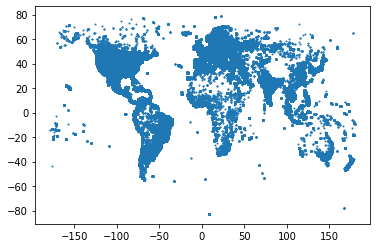

In [7]:
# Display distribution
plt.scatter(df4['longitude'], df4['latitude'], s=1)
plt.show()

# Combine caida traces (or splits) and extract unique source ips

In [8]:
# Loop over caida trace(s) in csv format and return unique set
output_file = r'unique_src_ips.csv'  # output file

unique_ip = None
for file in sorted(os.listdir(trace_folder)):
    print("Processing file", file)
    
    # Read, extract ip, drop duplicates
    df = pd.read_csv(os.path.join(trace_folder,file))['ip.src'].drop_duplicates()
    
    # if first set simply copy
    if unique_ip is None:
        unique_ip = df
    else:
        # otherwise concatenate
        unique_ip = pd.concat([unique_ip, df], ignore_index=True).drop_duplicates()
        
# output
print(len(unique_ip),"unique ip addresses")
unique_ip.to_csv(os.path.join(geolite_folder, "unique_ip_in_caida.csv"), index=False)

Processing file equinix-nyc.dirA.20190117-130000.UTC.anon.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon1.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon10.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon11.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon12.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon13.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon14.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon15.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon16.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon17.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon18.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon19.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon2.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon20.csv
Processing file equinix-nyc.dirA.20190117-130000.UTC.anon21.csv
Processing file equinix-nyc.dirA.20190117-13

Processing file equinix-nyc.dirA.20190117-131000.UTC.anon11.csv
Processing file equinix-nyc.dirA.20190117-131000.UTC.anon2.csv
Processing file equinix-nyc.dirA.20190117-131000.UTC.anon3.csv
Processing file equinix-nyc.dirA.20190117-131000.UTC.anon4.csv
Processing file equinix-nyc.dirA.20190117-131000.UTC.anon5.csv
Processing file equinix-nyc.dirA.20190117-131000.UTC.anon6.csv
Processing file equinix-nyc.dirA.20190117-131000.UTC.anon7.csv
Processing file equinix-nyc.dirA.20190117-131000.UTC.anon8.csv
Processing file equinix-nyc.dirA.20190117-131000.UTC.anon9.csv
Processing file equinix-nyc.dirA.20190117-131100.UTC.anon.csv
Processing file equinix-nyc.dirA.20190117-131100.UTC.anon1.csv
Processing file equinix-nyc.dirA.20190117-131100.UTC.anon10.csv
Processing file equinix-nyc.dirA.20190117-131100.UTC.anon11.csv
Processing file equinix-nyc.dirA.20190117-131100.UTC.anon2.csv
Processing file equinix-nyc.dirA.20190117-131100.UTC.anon3.csv
Processing file equinix-nyc.dirA.20190117-131100.UTC.

Processing file equinix-nyc.dirA.20190117-132100.UTC.anon11.csv
Processing file equinix-nyc.dirA.20190117-132100.UTC.anon2.csv
Processing file equinix-nyc.dirA.20190117-132100.UTC.anon3.csv
Processing file equinix-nyc.dirA.20190117-132100.UTC.anon4.csv
Processing file equinix-nyc.dirA.20190117-132100.UTC.anon5.csv
Processing file equinix-nyc.dirA.20190117-132100.UTC.anon6.csv
Processing file equinix-nyc.dirA.20190117-132100.UTC.anon7.csv
Processing file equinix-nyc.dirA.20190117-132100.UTC.anon8.csv
Processing file equinix-nyc.dirA.20190117-132100.UTC.anon9.csv
Processing file equinix-nyc.dirA.20190117-132200.UTC.anon.csv
Processing file equinix-nyc.dirA.20190117-132200.UTC.anon1.csv
Processing file equinix-nyc.dirA.20190117-132200.UTC.anon10.csv
Processing file equinix-nyc.dirA.20190117-132200.UTC.anon11.csv
Processing file equinix-nyc.dirA.20190117-132200.UTC.anon2.csv
Processing file equinix-nyc.dirA.20190117-132200.UTC.anon3.csv
Processing file equinix-nyc.dirA.20190117-132200.UTC.

## Join pre-processed geolite (df4) with unique ips

In [9]:
mapping = pd.merge(df4[['longitude', 'latitude']].sample(frac=1), unique_ip.sample(frac=1), left_index=True, right_index=True)
mapping.to_csv(os.path.join(geolite_folder, 'geo_ip_mapping.csv'), index=False)

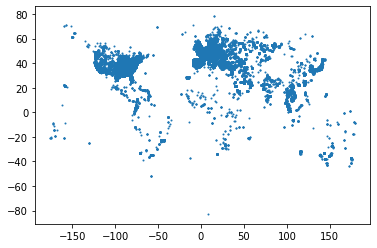

In [7]:
# plot joined data to ensure distribution is still close to geolite distribution
plt.scatter(mapping['longitude'], mapping['latitude'], s=1)
plt.show()

# Combines traces to be mapped to geolocation scaled to any NxN grid

For every trace this will obtain it's longitude and latitude based on the source ip, afterwards this source ip can be dropped and the relevant data [timestamp, ip (target), longitude, latitude] is left. Each set will be appended to the same csv, creating one large dataset.

In [5]:
N = 4096  # size of the grid (ranging from 0 to N-1)
dataset_sizes = [1000*1000, 2*1000*1000, 10*1000*1000, 20*1000*1000, 40*1000*1000, 60*1000*1000, 80*1000*1000, 100*1000*1000, 500*1000*1000]  # number of records you want the dataset to contain

# read in mapping file
mapping = pd.read_csv(os.path.join(geolite_folder, 'geo_ip_mapping.csv'))

for nr_of_records in dataset_sizes:
    print("Generating dataset of {} records", nr_of_records)
    # create empty dataframe with [timestamp, ip, long, lat] at output location
    current_lines = 0
    output = os.path.join(geolite_folder, 'GeoCaidaN{}L{}.csv'.format(N, int(nr_of_records/1000/1000)))
    pd.DataFrame([['timestamp', 'ip', 'longitude', 'latitude']]).to_csv(output, header=None, index=False)

    last_timestamp = None
    for file in sorted(os.listdir(trace_folder)): #, key=lambda key: int(key.split("-")[2]) + int(key.split("-")[3].split(".")[0])):
        df = pd.read_csv(os.path.join(trace_folder, file))
        res = pd.merge(df, mapping, how='left', on='ip.src')  # join on source ip
        res = res.dropna().drop(columns='ip.src') # after which source ip can be dropped
        res['ip'] = res['ip.dst']; # rename ip.dst to ip

        # map longitude and latitude to [0, N-1]
        res['longitude'] = (((res['longitude']+180)/360) * (N - 1)).astype(int)
        res['latitude'] = (((res['latitude']+90)/180) * (N - 1)).astype(int)


        # Write to file until nr_of_records reached
        if current_lines + len(res) > nr_of_records:
            res[['timestamp', 'ip', 'longitude', 'latitude']][0:nr_of_records - current_lines].to_csv(output, mode='a', header=False, index=False)
            break
        else:
            res[['timestamp', 'ip', 'longitude', 'latitude']].to_csv(output, mode='a', header=False, index=False)
            current_lines += len(res)

        # verify timestamp is sorted and first timestamp is higher than last of existing csv
       # if res['timestamp'][0]>res['timestamp'][len(res)-1]:
       #     print('internal', res['timestamp'][0], res['timestamp'][len(res)-1])
       # if last_timestamp is None:
       #     last_timestamp = res['timestamp'][len(res)-1]
       # else:
       #     if last_timestamp > res['timestamp'][0]:
       #         print('timestamps problem ', last_timestamp, res['timestamp'][0:5])
       #     last_timestamp = res['timestamp'][len(res)-1]
    